<a href="https://colab.research.google.com/github/surajss28/Retail-Sales-Analysis/blob/main/sales_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retail Sales Data Project**



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **SQL Queries for Sales Analysis Project**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


In [3]:
df = pd.read_excel("/content/drive/MyDrive/sales_data_project.xlsx")
conn = sqlite3.connect("/content/drive/MyDrive/sales_data_project.db")
df.to_sql("sales_data", conn, if_exists="replace", index=False)


10000

## 1. **Total Sales by Region**

### **Description:**  Summarizes total revenue by geographic region.

### **Use Case:** To identify which region is contributing the most revenue.

In [4]:
query4 = '''SELECT region, SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY region
ORDER BY total_sales DESC;
'''
region_sales = pd.read_sql(query4, conn)
print(region_sales)

  region  total_sales
0   West   3829659.06
1  South   3811769.58
2  North   3783405.15
3   East   3678230.32


## 2. **Monthly Sales Trend**

### **Description:**  Aggregates sales by month to track time-based performance.

### **Use Case:** Used in line charts and time-series trend analysis.

In [5]:
query5 = '''SELECT
               strftime('%Y-%m', order_date) AS month,
               SUM(sales_amount) AS total_sales
            FROM sales_data
            GROUP BY month
            ORDER BY month;
'''
monthly_sales = pd.read_sql(query5, conn)
print(monthly_sales)

      month  total_sales
0   2022-01    468445.14
1   2022-02    396087.01
2   2022-03    397683.35
3   2022-04    394675.80
4   2022-05    390353.80
5   2022-06    379672.71
6   2022-07    446021.23
7   2022-08    386211.41
8   2022-09    398377.04
9   2022-10    455687.96
10  2022-11    428668.94
11  2022-12    421649.92
12  2023-01    420649.01
13  2023-02    361089.80
14  2023-03    449786.58
15  2023-04    410213.14
16  2023-05    432006.91
17  2023-06    366352.12
18  2023-07    426826.96
19  2023-08    433862.85
20  2023-09    428015.17
21  2023-10    487054.13
22  2023-11    440148.90
23  2023-12    383102.55
24  2024-01    460494.36
25  2024-02    404720.86
26  2024-03    446228.29
27  2024-04    469801.57
28  2024-05    443674.47
29  2024-06    401125.06
30  2024-07    368483.37
31  2024-08    371836.65
32  2024-09    438397.05
33  2024-10    414018.62
34  2024-11    377081.84
35  2024-12    504559.54


## 3. **Top 5 Products by Revenue**

### **Description:**  Returns the top-grossing products.

### **Use Case:** Understand product performance and plan promotions.

In [6]:
query6 = '''SELECT
              product_name,
              SUM(sales_amount) AS total_revenue
            FROM sales_data
            GROUP BY product_name
            ORDER BY total_revenue DESC
            LIMIT 5;
'''
top_products_revenue = pd.read_sql(query6, conn)
print(top_products_revenue)

  product_name  total_revenue
0        Jeans     1733169.05
1       Laptop     1711815.45
2       Tablet     1701647.20
3        Shirt     1683594.40
4         Sofa     1682874.30


## 4. **Sales by Region and Product Category**

### **Description:**  Breaks down sales into a 2D matrix of regions vs categories.

### **Use Case:** Pivot-style summary to identify strong product areas in each region.

In [7]:
query7 = '''SELECT
    region,
    product_category,
    SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY region, product_category
ORDER BY region, total_sales DESC;
'''
sales_by_region_and_product_cat = pd.read_sql(query7, conn)
print(sales_by_region_and_product_cat)

   region product_category  total_sales
0    East         Clothing   1241169.63
1    East      Electronics   1231216.33
2    East        Furniture   1205844.36
3   North        Furniture   1320351.08
4   North      Electronics   1246445.77
5   North         Clothing   1216608.30
6   South         Clothing   1323288.41
7   South      Electronics   1258737.85
8   South        Furniture   1229743.32
9    West      Electronics   1347733.48
10   West         Clothing   1295131.63
11   West        Furniture   1186793.95


## 5. **Average Order Value (AOV) per Region**

### **Description:**  Calculates the average revenue generated per order.

### **Use Case:** Benchmark regional spending habits or marketing effectiveness.

In [8]:
query8 = '''SELECT
    region, ROUND(AVG(sales_amount),2) AS average_order_value
    FROM sales_data
    GROUP BY region
    ORDER BY average_order_value DESC;
'''
aov_per_region = pd.read_sql(query8, conn)
print(aov_per_region)

  region  average_order_value
0  South              1552.66
1   West              1520.91
2  North              1486.60
3   East              1481.96


## 6. **Month-over-Month Sales Growth**

### **Description:**  Compares monthly sales to the previous month.

### **Use Case:** Track growth/decline trends, detect seasonality.

In [28]:
query9 = '''WITH monthly_sales AS (
                  SELECT
                    strftime('%Y-%m', order_date) AS month,
                    SUM(sales_amount) AS total_sales
                    FROM sales_data
                    GROUP BY month
               ),
               sales_with_lag AS (
                  SELECT
                    month,
                    total_sales,
                    LAG(total_sales) OVER (ORDER BY month) AS previous_sales
                  FROM monthly_sales
               )

          SELECT
              month,
              total_sales,
              previous_sales,
              ROUND((total_sales - previous_sales) * 100.0 / previous_sales, 2) AS mom_growth_percent
          FROM sales_with_lag
          WHERE previous_sales IS NOT NULL;

'''
Month_over_month = pd.read_sql(query9, conn)
print(Month_over_month)

      month  total_sales  previous_sales  mom_growth_percent
0   2022-02    396087.01       468445.14              -15.45
1   2022-03    397683.35       396087.01                0.40
2   2022-04    394675.80       397683.35               -0.76
3   2022-05    390353.80       394675.80               -1.10
4   2022-06    379672.71       390353.80               -2.74
5   2022-07    446021.23       379672.71               17.48
6   2022-08    386211.41       446021.23              -13.41
7   2022-09    398377.04       386211.41                3.15
8   2022-10    455687.96       398377.04               14.39
9   2022-11    428668.94       455687.96               -5.93
10  2022-12    421649.92       428668.94               -1.64
11  2023-01    420649.01       421649.92               -0.24
12  2023-02    361089.80       420649.01              -14.16
13  2023-03    449786.58       361089.80               24.56
14  2023-04    410213.14       449786.58               -8.80
15  2023-05    432006.91

## 7. **Category Share of Total Sales**

### **Description:**  Shows each category’s share (%) of the total sales.

### **Use Case:** Understand which product categories are dominating.


In [10]:
query10 = '''SELECT
         product_category,
         SUM(sales_amount) AS total_sales,
         ROUND(SUM(sales_amount) *100/(SELECT SUM(sales_amount) FROM sales_data),2) AS total_percentage_share
         FROM sales_data
         GROUP BY product_category
         ORDER BY total_percentage_share DESC

'''
each_cat_share = pd.read_sql(query10, conn)
print(each_cat_share)

  product_category  total_sales  total_percentage_share
0      Electronics   5084133.43                   33.66
1         Clothing   5076197.97                   33.61
2        Furniture   4942732.71                   32.73


## 8. **Quarterly Sales Summary**

### **Description:**  Groups total sales by quarter.

### **Use Case:** For strategic review and financial reporting.

In [11]:
query11 = '''SELECT
         strftime('%Y', order_date) AS customer_order_year,
         ((CAST(strftime('%m', order_date) AS INTEGER) - 1) / 3 + 1) AS quarter,
         SUM(sales_amount) AS quaterly_revenue
         FROM sales_data
         GROUP BY quarter, customer_order_year
         ORDER BY customer_order_year;
'''
quarterly_sales = pd.read_sql(query11, conn)
print(quarterly_sales)

   customer_order_year  quarter  quaterly_revenue
0                 2022        1        1262215.50
1                 2022        2        1164702.31
2                 2022        3        1230609.68
3                 2022        4        1306006.82
4                 2023        1        1231525.39
5                 2023        2        1208572.17
6                 2023        3        1288704.98
7                 2023        4        1310305.58
8                 2024        1        1311443.51
9                 2024        2        1314601.10
10                2024        3        1178717.07
11                2024        4        1295660.00


## 9. **Orders with Highest Revenue (Top 10 Transactions)**

### **Description:**  Lists the most valuable individual orders.

### **Use Case:** Find outliers, possible bulk purchases, or big clients.

In [12]:
query12 = '''SELECT
    order_id,
    order_date,
    region,
    product_name,
    sales_amount
FROM sales_data
ORDER BY sales_amount DESC
LIMIT 10;
'''
top_10_orders_highest_revenue = pd.read_sql(query12, conn)
print(top_10_orders_highest_revenue)

   order_id           order_date region product_name  sales_amount
0      8047  2023-11-10 00:00:00   East   Smartphone       4999.45
1      7295  2022-03-01 00:00:00  South       Jacket       4988.50
2      7438  2023-07-23 00:00:00   West       Jacket       4987.15
3      8999  2024-03-18 00:00:00  North        Chair       4986.85
4      5886  2024-09-03 00:00:00  North        Jeans       4986.40
5      4290  2024-06-15 00:00:00   East        Jeans       4983.75
6       295  2022-04-23 00:00:00   East   Smartphone       4983.50
7       743  2023-09-11 00:00:00   West   Smartphone       4982.05
8      7137  2023-05-02 00:00:00  North        Shirt       4979.65
9      4559  2024-03-13 00:00:00   East         Sofa       4979.45


## 10. **Count of Unique Products Sold per Region**

### **Description:**  Measures product diversity in different regions.

### **Use Case:** See which region sells more types of products.

In [13]:
query13 = '''SELECT
    region,
    COUNT(DISTINCT product_name) AS unique_products_sold
FROM sales_data
GROUP BY region
ORDER BY unique_products_sold DESC;
'''
unique_products_sold_per_region = pd.read_sql(query13, conn)
print(unique_products_sold_per_region)

  region  unique_products_sold
0   West                     9
1  South                     9
2  North                     9
3   East                     9


# **Python Data Analysis & Visualization**

## 1. **Total Sales by Region (Bar Plot)**

### **Description:**  Shows the total revenue contribution from each region.

### **Use Case:** Helps decision-makers identify top-performing regions and allocate resources.

/tmp/ipython-input-14-1271602007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")


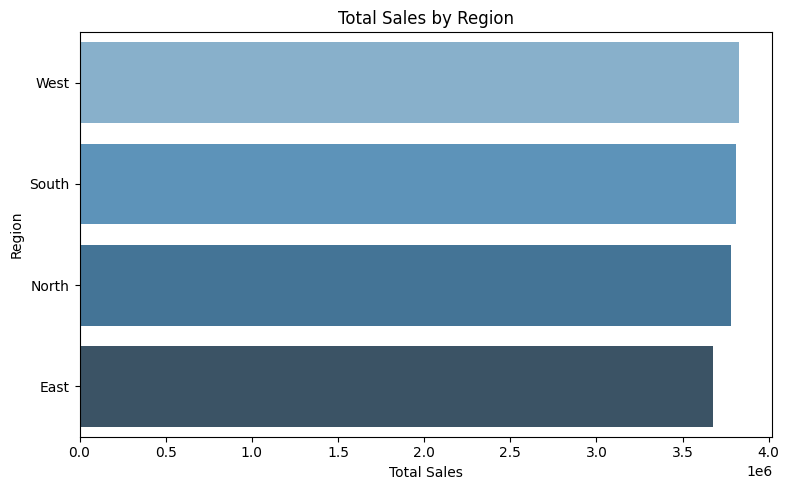

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/drive/MyDrive/sales_data_project.xlsx")

# Total sales by region
region_sales = df.groupby('region')['sales_amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")
plt.title("Total Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### The bar chart clearly shows which region generates the highest revenue. This can help prioritize high-performing areas for resource allocation or deeper customer analysis. Regions with low performance could signal under-penetrated markets.

## 2. **Monthly Sales Trend (Line Plot)**

### **Description:**  Tracks how sales have changed over time month-by-month.

### **Use Case:** Detect seasonality, spikes, or downward trends.

/tmp/ipython-input-15-2910894970.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()


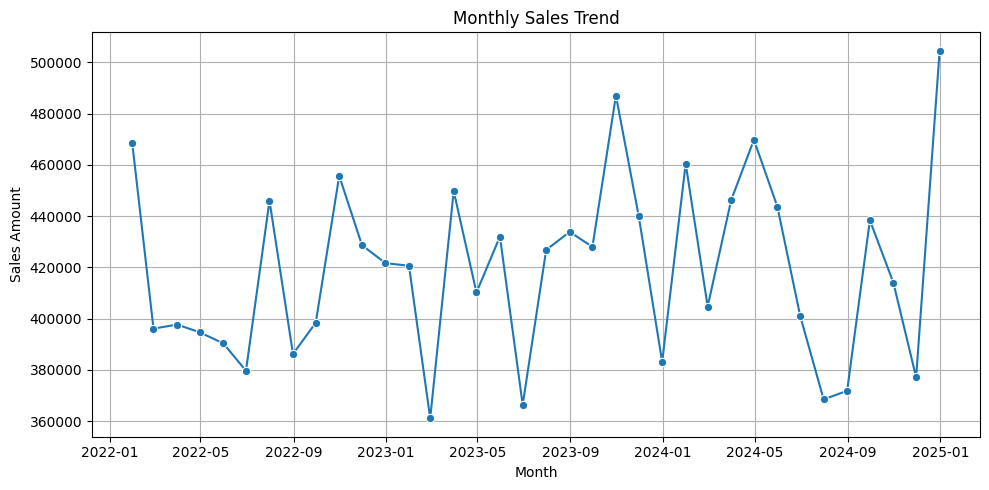

In [15]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Monthly sales
monthly_sales = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='order_date', y='sales_amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


### This plot reveals seasonality and growth trends. Any noticeable spike or dip can be linked to promotions, holidays, or supply issues. It’s also useful for identifying consistent growth or monthly fluctuations.

## 3. **Top 10 Products by Revenue (Bar Plot)**

### **Description:**  Ranks the best-selling products based on total revenue.

### **Use Case:** Inventory planning, bundling strategies, or promotional targeting.

/tmp/ipython-input-16-2248149522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


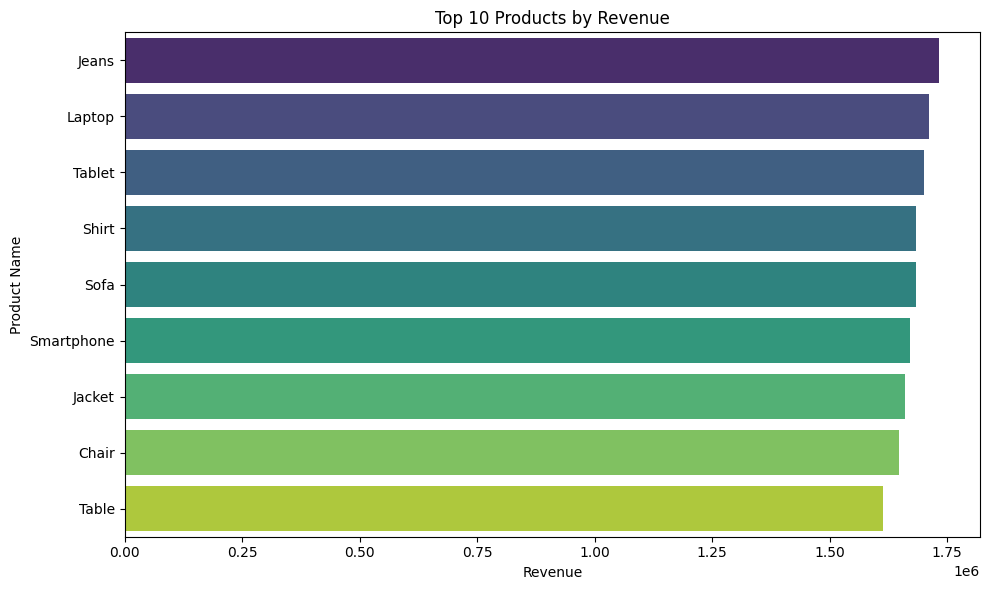

In [16]:
top_products = df.groupby('product_name')['sales_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### These are your best-selling products. They deserve focused marketing, optimized inventory, or bundling offers. If any product here also has a high return rate or low margin, it needs deeper investigation.

## 4. **Sales Distribution by Product Category (Pie Chart)**

### **Description:**  Shows what percentage each product category contributes to total sales.

### **Use Case:** Portfolio management and category-level focus.

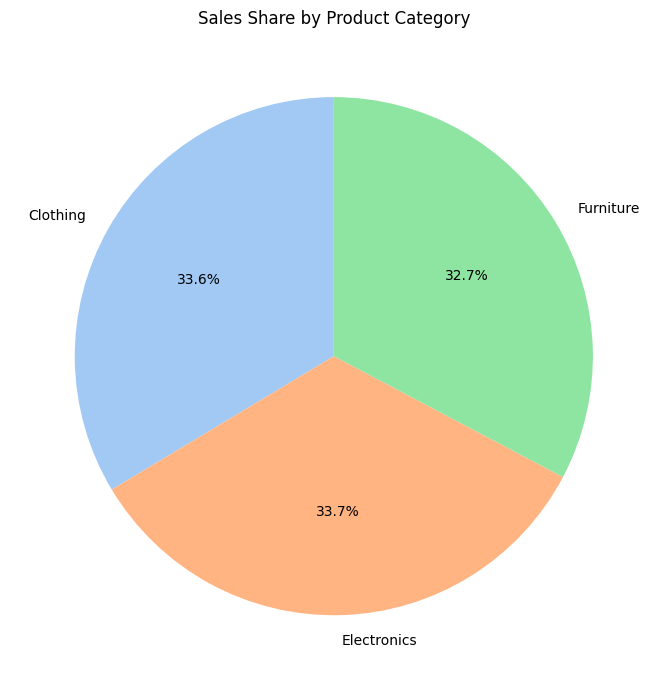

In [17]:
category_sales = df.groupby('product_category')['sales_amount'].sum()

# Plot
plt.figure(figsize=(7,7))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Share by Product Category")
plt.ylabel("")
plt.tight_layout()
plt.show()


### This pie chart shows what share of revenue each category holds. If one category dominates, it may drive most of the business risk. A balanced contribution is usually healthier.

## 5. **Quantity vs Sales Amount (Scatter Plot)**

### **Description:**  Visualizes the relationship between quantity sold and sales revenue.

### **Use Case:** Detect outliers or high-value low-quantity products (or vice versa).

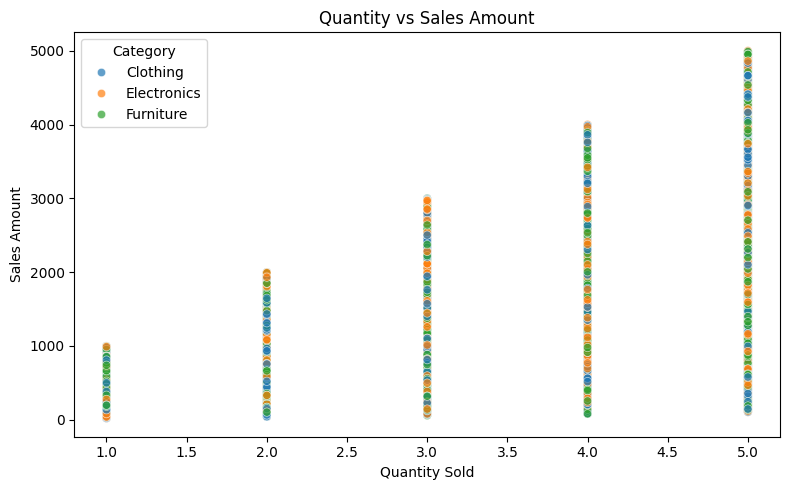

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='quantity', y='sales_amount', hue='product_category', alpha=0.7)
plt.title("Quantity vs Sales Amount")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales Amount")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


### High sales with low quantity could mean premium items; high quantity with low sales might mean budget products. The plot also helps identify pricing anomalies or potential fraud if values are far outside the cluster.

## 6. **Boxplot of Sales by Region**

### **Description:**  Shows the spread (min, median, max) of order values per region.

### **Use Case:** Identify regions with higher order value variability or potential pricing anomalies.

/tmp/ipython-input-19-2137872472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='sales_amount', palette='Set2')


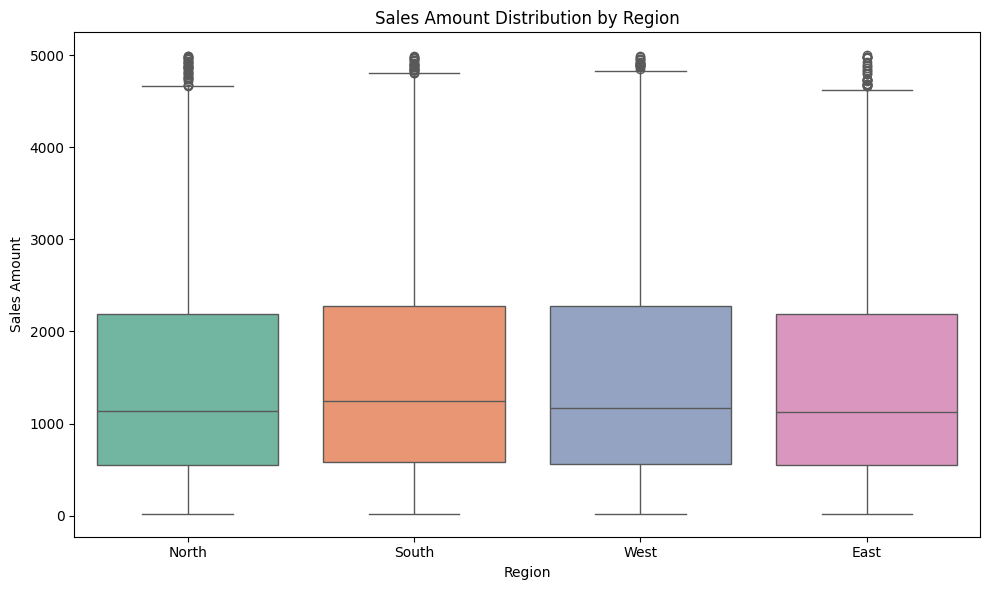

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='region', y='sales_amount', palette='Set2')
plt.title("Sales Amount Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()


### The boxplot shows order value variability across regions. A wide box or long whiskers indicate inconsistent customer behavior. Outliers (dots) may reveal big-ticket orders worth investigating further.

# **Sales Forecasting Using Prophet**

In [20]:
from prophet import Prophet

### Prepare the Data

In [21]:
# Load the data
df = pd.read_excel("/content/drive/MyDrive/sales_data_project.xlsx")

# Convert order_date to datetime and aggregate monthly sales
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()

# Rename columns for Prophet
prophet_df = monthly_sales.rename(columns={'order_date': 'ds', 'sales_amount': 'y'})


/tmp/ipython-input-21-2750738220.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()


### Train the Prophet Model

In [22]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh2iqlla/q7mnqwji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh2iqlla/5gx8zxzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24349', 'data', 'file=/tmp/tmpeh2iqlla/q7mnqwji.json', 'init=/tmp/tmpeh2iqlla/5gx8zxzp.json', 'output', 'file=/tmp/tmpeh2iqlla/prophet_model_u2rn0pn/prophet_model-20250718134948.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Make Future Forecast

In [23]:
# Forecast 3 months into the future
future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


### Visualize the Forecast

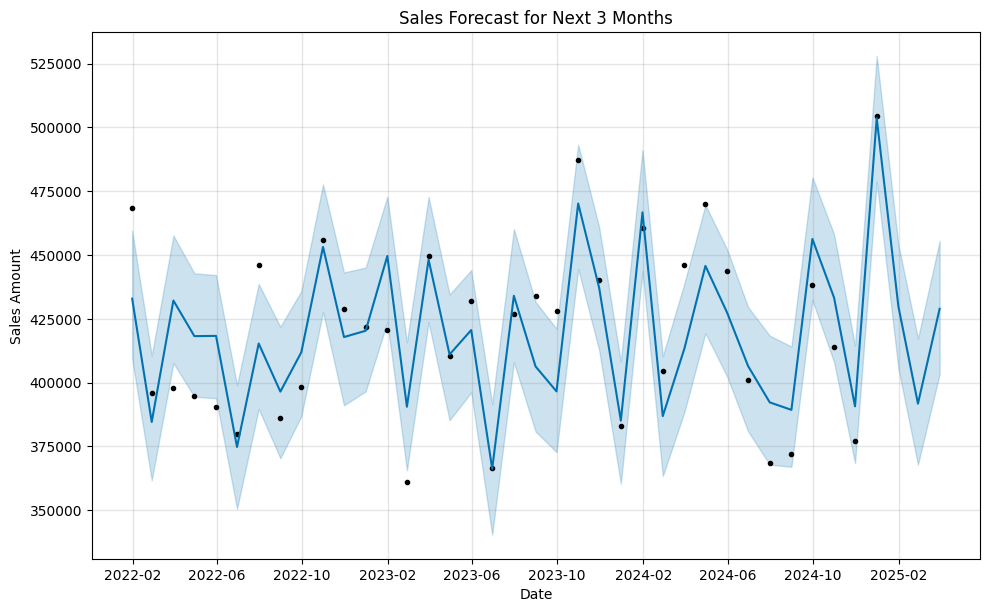

In [24]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast for Next 3 Months")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()


### Plot Forecast Components

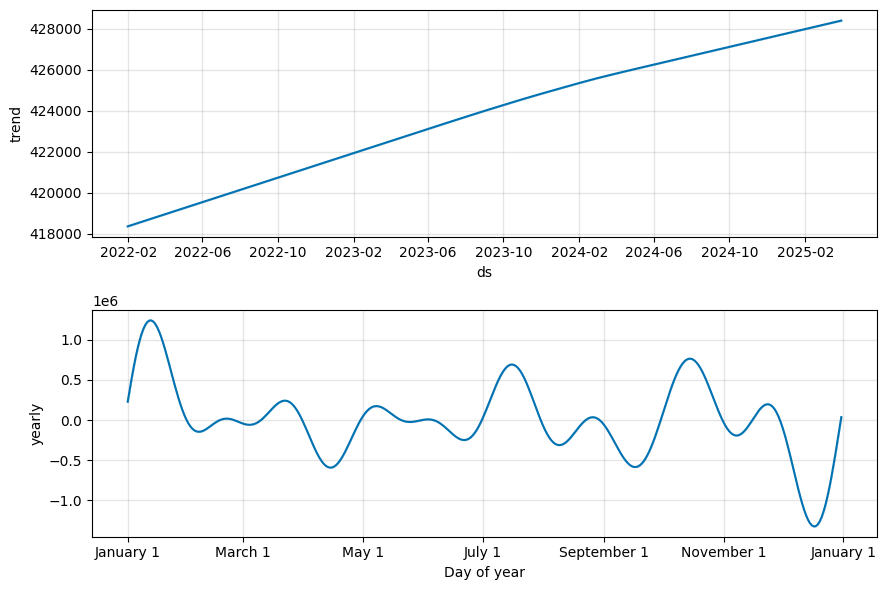

In [25]:
# Plot components: trend, seasonality
fig2 = model.plot_components(forecast)
plt.show()
